In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
df_저 = pd.read_csv('data/어장환경관측자료(저층).csv')

In [71]:
font_path = "data/서울한강 장체EB.TTF"  # 실제 한글 폰트 파일 경로로 변경해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [72]:
df_저.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15121 entries, 0 to 15120
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   어장명         15121 non-null  object 
 1   정점          15121 non-null  int64  
 2   정점2         15121 non-null  int64  
 3   위도          15121 non-null  float64
 4   경도          15121 non-null  float64
 5   어장종류        15120 non-null  object 
 6   년도          15121 non-null  int64  
 7   월           15121 non-null  int64  
 8   일           15121 non-null  int64  
 9   기상          15121 non-null  object 
 10  수심(m)       15113 non-null  float64
 11  수온(저)       14900 non-null  float64
 12  수온(차이)      15121 non-null  float64
 13  염분(저)       14900 non-null  float64
 14  Ph(저)       14900 non-null  float64
 15  DO(저)       14900 non-null  float64
 16  COD(저)      14900 non-null  float64
 17  NH4-N(저)    14900 non-null  float64
 18  NO3-N(저)    14900 non-null  float64
 19  NO2-N(저)    14900 non-nul

In [73]:
df_저.isnull().sum()

어장명             0
정점              0
정점2             0
위도              0
경도              0
어장종류            1
년도              0
월               0
일               0
기상              0
수심(m)           8
수온(저)         221
수온(차이)          0
염분(저)         221
Ph(저)         221
DO(저)         221
COD(저)        221
NH4-N(저)      221
NO3-N(저)      221
NO2-N(저)      221
DIN(저)        221
TN(저)         221
DIP(저)        221
TP(저)         221
SIO2-SI(저)    221
CHL-A(저)      221
SS(저)         221
투명도           221
dtype: int64

In [74]:
# df_저 = df_저.dropna()

In [75]:
# df_저.isnull().sum()

In [76]:
(df_저['DO(저)']<=3).value_counts()

# df_저 = df[(df['DO(저)']<=3)]
# df_저
# csv_filename = 'filtered_data(저).csv'
# df_저.to_csv(csv_filename, index=False)

# print(f"Filtered data saved to {csv_filename}")

False    14736
True       385
Name: DO(저), dtype: int64

In [77]:
df2 = df_저[df_저['DO(저)']<=3] #저층 DO가 3이하인 데이터 384개
df2

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
1994,가로림만,6,8,36.931111,126.344722,패류,2010,12,1,-,...,0.132,0.005,4.148,0.562,0.023,0.024,0.333,0.29,16.0,0.8
2000,가로림만,4,7,36.914444,126.365278,패류,2010,12,1,-,...,0.123,0.004,4.136,0.740,0.024,0.027,0.282,0.34,20.4,0.7
2338,천수만,1,34,36.614722,126.370556,패류,2010,8,9,-,...,0.005,0.005,4.235,0.251,0.072,0.081,0.954,1.75,15.0,1.5
2423,천수만,2,32,36.594722,126.403333,굴,2017,8,5,맑음,...,0.021,0.004,4.353,0.559,0.072,0.078,1.598,1.97,46.0,1.4
4124,진해만,8,135,35.944722,128.443889,패류,2010,10,14,-,...,0.039,0.005,4.318,0.596,0.086,0.088,1.821,0.75,1.6,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10890,통영외안,13,16,34.726667,128.047500,어류,2021,8,4,맑음,...,0.013,0.002,4.020,0.265,0.006,0.050,0.359,1.35,2.6,7.0
11153,가막만,5,29,34.714167,127.738611,패류,2010,8,4,-,...,0.030,0.006,8.590,0.150,0.005,0.019,0.461,4.99,5.0,2.0
12384,완도,3,3,34.573611,127.687222,해조류,2009,5,13,-,...,0.009,0.043,4.053,0.912,0.005,0.027,0.200,1.70,19.0,1.5
12437,완도,2,1,34.572500,127.729444,해조류,2009,5,13,-,...,0.016,0.023,4.040,0.831,0.006,0.031,0.213,2.24,31.0,1.3


In [78]:
group = df2.groupby('어장명').size().reset_index(name='개수')
group

,어장명,개수
0,가로림만,2
1,가막만,4
2,거제도남안,2
3,고성자란만,16
4,마산만,25
5,부산,1
6,사천,1
7,섬진강하구,4
8,완도,2
9,진주만,1


=> 총 11곳의 어장에서 빈산소수괴가 발생함

In [79]:
group정점 = df2.groupby(['어장명','정점']).size().reset_index(name='개수')
group정점

,어장명,정점,개수
0,가로림만,4,1
1,가로림만,6,1
2,가막만,1,2
3,가막만,3,1
4,가막만,5,1
...,...,...,...
86,통영,10,1
87,통영,11,1
88,통영외안,6,1
89,통영외안,12,2


In [80]:
df2['어장명'].unique()

array(['가로림만', '천수만', '진해만', '마산만', '부산', '진주만', '고성자란만', '섬진강하구', '사천',
       '통영', '통영외안', '거제도남안', '가막만', '완도'], dtype=object)

In [81]:
df2_ = df_저[df_저['DO(저)']>3] #저층 DO가 3초과 데이터
df2_ 

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
0,곰소만,2,38,126.589167,35.565833,패류,2011,12,1,-,...,0.160,0.012,0.262,0.333,0.023,0.025,0.481,1.04,169.4,0.7
1,곰소만,2,38,126.589167,35.565833,패류,2011,10,1,-,...,0.012,0.002,0.039,0.097,0.012,0.012,0.133,0.45,77.8,1.3
2,곰소만,2,38,126.589167,35.565833,패류,2011,8,1,-,...,0.258,0.056,0.496,0.710,0.042,0.078,0.897,0.78,124.6,0.3
3,곰소만,2,38,126.589167,35.565833,패류,2011,6,1,-,...,0.014,0.005,0.036,0.455,0.004,0.018,0.250,1.81,37.0,0.7
4,곰소만,2,38,126.589167,35.565833,패류,2011,4,1,-,...,0.002,0.001,0.006,0.289,0.001,0.030,0.038,1.03,21.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116,서귀포,1,4,33.216667,126.490000,연안,2013,10,29,-,...,0.027,0.002,0.039,0.039,0.002,0.006,0.104,1.03,4.4,12.4
15117,서귀포,1,4,33.216667,126.490000,연안,2013,8,8,-,...,0.015,0.002,0.027,0.055,0.001,0.006,0.256,0.96,2.2,13.8
15118,서귀포,1,4,33.216667,126.490000,연안,2013,6,12,-,...,0.063,0.005,0.087,0.170,0.010,0.015,0.221,0.67,0.7,10.9
15119,서귀포,1,4,33.216667,126.490000,연안,2013,4,4,-,...,0.035,0.009,0.062,0.220,0.006,0.013,0.180,1.33,0.3,10.2


In [82]:
df2진해만 = df2[df2['어장명']=='진해만'] # 저층 3이하 진해만 데이터
df2진해만

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
4124,진해만,8,135,35.944722,128.443889,패류,2010,10,14,-,...,0.039,0.005,4.318,0.596,0.086,0.088,1.821,0.75,1.60,5.7
4125,진해만,8,135,35.944722,128.443889,패류,2010,8,24,-,...,0.028,0.001,4.189,0.453,0.062,0.098,1.069,0.85,2.65,3.0
5341,진해만,23,133,35.199167,128.585556,패류,2012,10,9,-,...,0.093,0.024,4.403,0.577,0.055,0.069,1.175,2.47,6.70,3.0
5342,진해만,23,133,35.199167,128.585556,패류,2012,8,7,-,...,0.006,0.002,4.056,0.572,0.034,0.086,1.240,18.68,9.40,1.0
5397,진해만,2,131,35.178333,128.589167,패류,2011,8,12,-,...,0.036,0.010,4.511,0.520,0.086,0.089,1.306,5.16,4.60,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8434,진해만,18,5,34.905000,128.432500,굴,2016,6,4,비,...,0.005,0.001,4.011,0.147,0.001,0.012,0.838,4.91,6.70,3.5
8438,진해만,18,5,34.905000,128.432500,패류,2015,6,3,맑음,...,0.001,0.001,4.009,0.268,0.003,0.029,0.822,6.63,6.50,6.0
8443,진해만,40,5,34.905000,128.432500,패류,2014,6,4,맑음(바람),...,0.016,0.001,4.024,0.133,0.002,0.017,0.480,3.28,9.30,5.0
8564,진해만,36,3,34.900833,128.433333,패류,2012,10,9,-,...,0.020,0.007,4.221,0.402,0.074,0.100,1.910,1.84,3.50,8.0


In [83]:
df2_진해만 = df2_[df2_['어장명']=='진해만'] #저층 3이하 진해만 데이터
df2_진해만

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
4112,진해만,26,136,35.966667,128.600833,패류,2012,12,11,-,...,0.107,0.014,0.159,0.314,0.027,0.035,0.709,0.03,4.10,7.0
4113,진해만,26,136,35.966667,128.600833,패류,2012,10,9,-,...,0.083,0.019,0.138,0.330,0.022,0.033,0.539,0.23,3.90,5.5
4114,진해만,26,136,35.966667,128.600833,패류,2012,8,7,-,...,0.014,0.006,0.077,0.314,0.021,0.038,0.511,3.46,3.45,3.9
4123,진해만,8,135,35.944722,128.443889,패류,2010,12,10,-,...,0.044,0.007,0.083,0.308,0.029,0.040,0.427,5.31,1.35,7.5
4126,진해만,8,135,35.944722,128.443889,패류,2010,4,7,-,...,0.008,0.001,0.017,0.144,0.008,0.019,0.197,5.46,1.95,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,진해만,19,2,34.894444,128.476111,패류,2013,6,4,-,...,0.006,0.000,0.010,0.203,0.001,0.018,0.302,2.55,4.00,5.0
8648,진해만,19,2,34.894444,128.476111,패류,2013,2,5,-,...,0.020,0.001,0.039,0.124,0.003,0.021,0.084,1.30,3.35,6.0
8765,진해만,16,1,34.883611,128.750278,패류,2012,12,13,-,...,0.151,0.013,0.223,0.267,0.022,0.044,0.710,0.03,11.90,2.0
8766,진해만,16,1,34.883611,128.750278,패류,2012,10,12,-,...,0.028,0.007,0.047,0.283,0.008,0.027,0.270,5.78,4.00,4.5


In [84]:
df2진해만['정점'].unique()

array([ 8, 23,  2, 22,  3, 21, 27, 30,  9, 31, 15, 28, 10,  5, 16,  4, 29,
       11, 33,  7, 17, 18, 12, 34, 43,  6, 42, 13, 35, 14, 36, 19, 41, 20,
       32, 37, 26, 48, 25, 44, 49, 40, 38, 47, 24, 39, 45], dtype=int64)

In [85]:
group_정점 = df2진해만.groupby('정점').size().reset_index(name='개수')
print(group_정점)

    정점  개수
0    2   1
1    3   3
2    4   3
3    5   4
4    6   5
5    7   2
6    8   9
7    9  11
8   10   3
9   11   5
10  12  12
11  13  11
12  14  14
13  15  13
14  16  10
15  17   8
16  18  10
17  19   2
18  20  15
19  21  12
20  22   8
21  23  16
22  24   5
23  25  15
24  26  17
25  27  12
26  28   2
27  29   2
28  30   6
29  31   3
30  32   2
31  33   3
32  34   5
33  35   4
34  36   6
35  37   4
36  38   5
37  39   3
38  40   3
39  41   2
40  42   2
41  43   2
42  44   3
43  45   3
44  47   3
45  48   2
46  49   1


In [86]:
df2진해만 = df2진해만[(df2진해만['정점'] == 4) & (df2진해만['어장명'] == '진해만')]
df2진해만

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
6181,진해만,4,94,35.059722,128.640833,진주담치,2022,8,3,맑음,...,0.020,0.007,4.125,0.256,0.037,0.973,0.058,1.81,11.1,5.0
6187,진해만,4,94,35.059722,128.640833,진주담치,2021,8,7,맑음,...,0.120,0.025,4.250,0.378,0.051,0.062,1.078,0.46,12.7,4.5
6210,진해만,4,94,35.059722,128.640833,진주담치,2017,8,2,맑음,...,0.124,0.010,4.234,0.338,0.060,0.070,1.509,2.67,8.8,3.0


In [87]:
df2_진해만 = df2_진해만[(df2_진해만['정점'] == 4) & (df2_진해만['어장명'] == '진해만')]
df2_진해만.head()

,어장명,정점,정점2,위도,경도,어장종류,년도,월,일,기상,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
5818,진해만,4,121,35.105278,128.632500,패류,2009,2,1,-,...,0.034,0.005,0.059,0.316,0.004,0.019,0.159,9.78,4.30,3.5
5819,진해만,4,120,35.102778,128.638056,패류,2011,12,8,-,...,0.117,0.018,0.210,0.412,0.033,0.049,1.036,6.20,3.45,4.5
5820,진해만,4,120,35.102778,128.638056,패류,2011,10,15,-,...,0.018,0.007,0.041,0.395,0.018,0.038,0.441,3.03,6.05,4.5
5821,진해만,4,120,35.102778,128.638056,패류,2011,8,12,-,...,0.106,0.024,0.302,0.496,0.041,0.051,0.937,2.06,2.60,2.0
5822,진해만,4,120,35.102778,128.638056,패류,2011,6,8,-,...,0.002,0.001,0.022,0.282,0.007,0.033,0.432,14.50,6.40,3.0


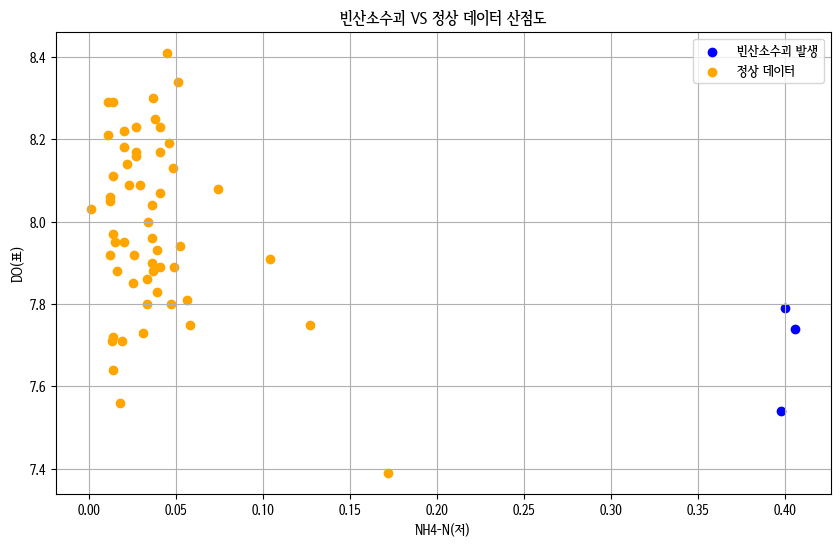

In [88]:
# 산점도 시각화 => 진해만 
plt.figure(figsize=(10, 6))
plt.scatter(df2진해만['NH4-N(저)'], df2진해만['Ph(저)'], color='blue', label='빈산소수괴 발생')
plt.scatter(df2_진해만['NH4-N(저)'], df2_진해만['Ph(저)'], color='orange', label='정상 데이터')
plt.xlabel('NH4-N(저)')
plt.ylabel('DO(표)')
plt.title('빈산소수괴 VS 정상 데이터 산점도')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
df2 = df2[df2['어장명']=='진해만']
df2['정점']

4124     8
4125     8
5341    23
5342    23
5397     2
        ..
8434    18
8438    18
8443    40
8564    36
8565    36
Name: 정점, Length: 292, dtype: int64

In [ ]:
# 산점도 시각화 => 진해만 
plt.figure(figsize=(10, 6))
plt.scatter(df2진해만['NH4-N(저)'], df2진해만['Ph(저)'], color='blue', label='빈산소수괴 발생')
plt.scatter(df2_진해만['NH4-N(저)'], df2_진해만['Ph(저)'], color='orange', label='정상 데이터')
plt.xlabel('NH4-N(저)')
plt.ylabel('DO(표)')
plt.title('빈산소수괴 VS 정상 데이터 산점도')
plt.legend()
plt.grid(True)
plt.show()